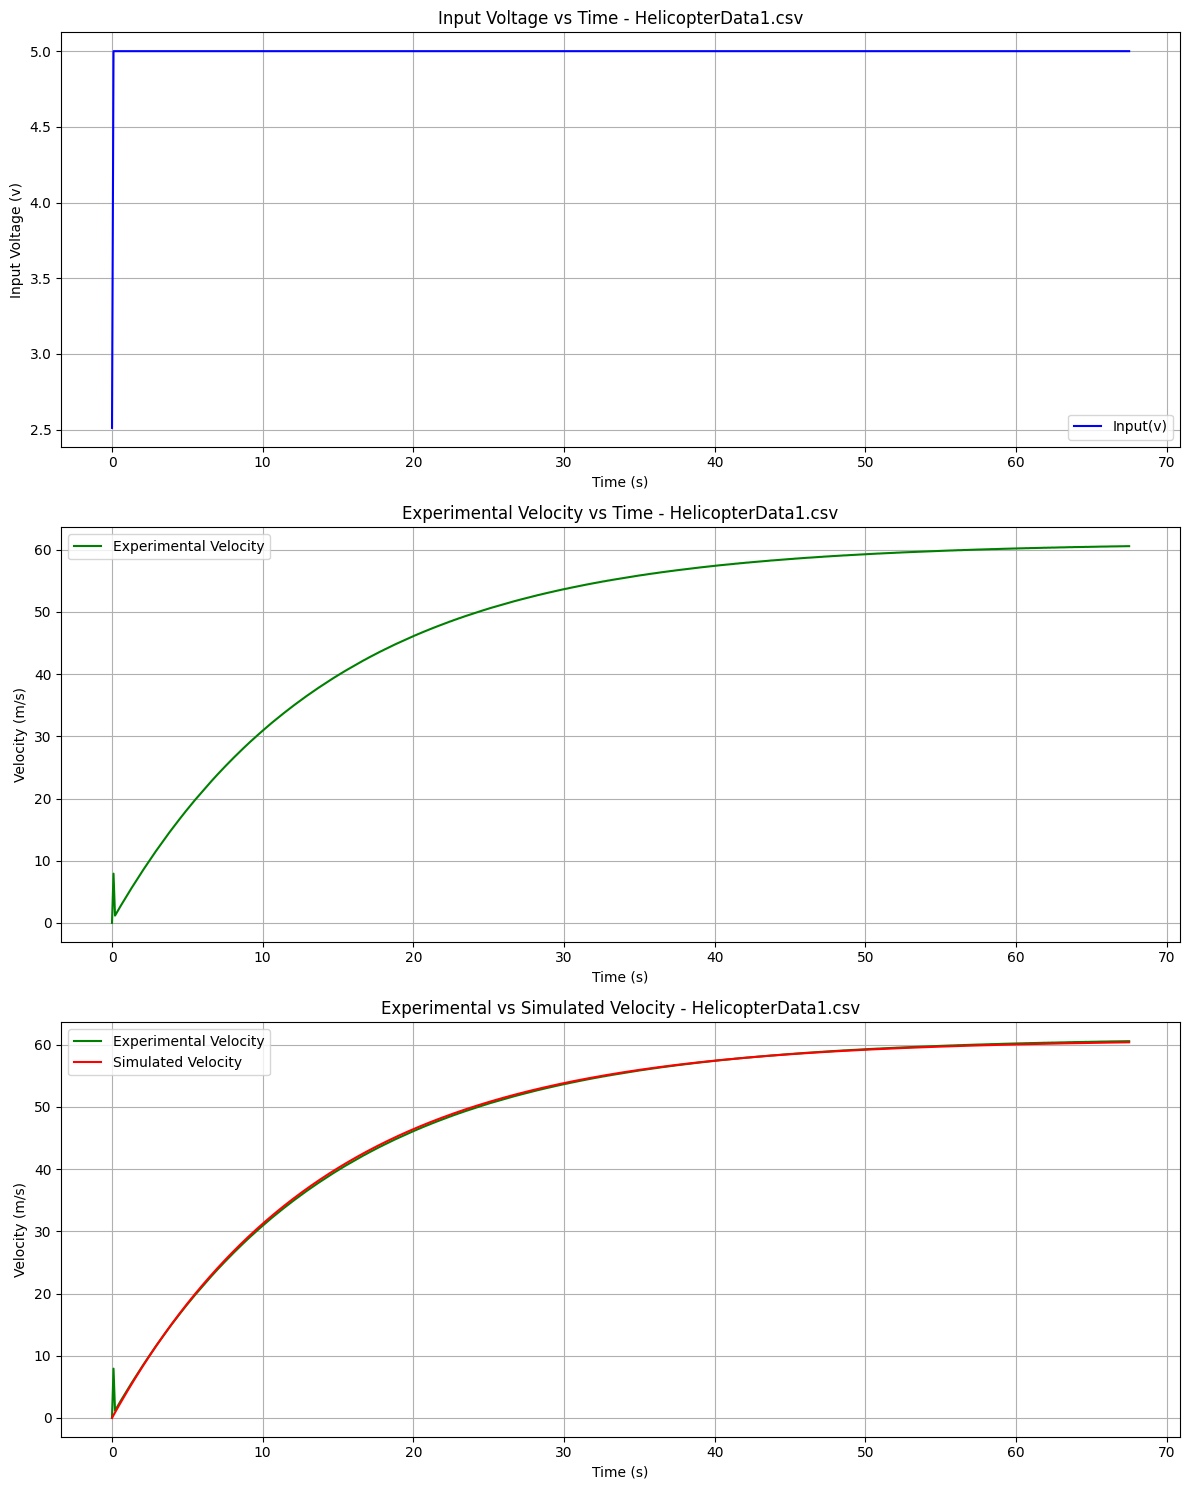

For file: HelicopterData1.csv
Gain (A): 24.348874598072097 m/s
Time Constant (tau): 13.9 s
Final Velocity: 60.58000000000337 m/s
The aerodynamic drag: 0.07194244604316546
Approximate Transfer Function for HelicopterData1.csv: G(s) = 24.348874598072097/13.9s + 1
---------------------------------------------------------------


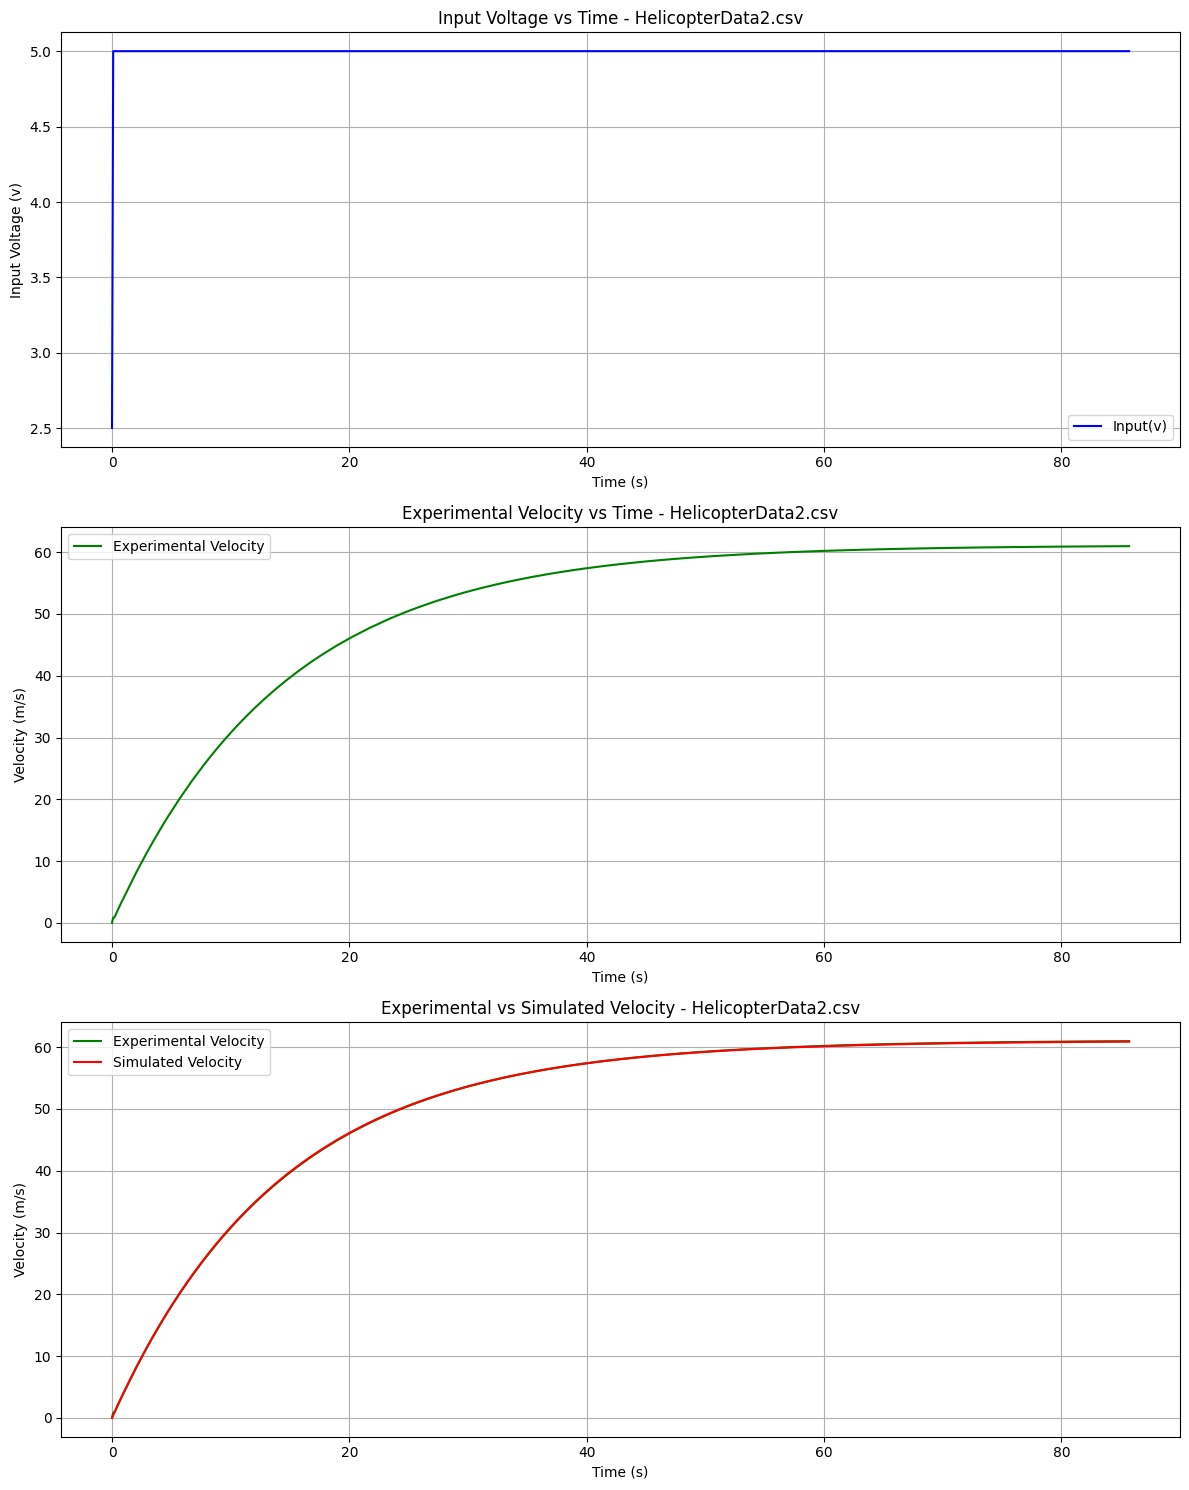

For file: HelicopterData2.csv
Gain (A): 24.417300760910024 m/s
Time Constant (tau): 14.200000000000001 s
Final Velocity: 60.969999999992325 m/s
The aerodynamic drag: 0.0704225352112676
Approximate Transfer Function for HelicopterData2.csv: G(s) = 24.417300760910024/14.200000000000001s + 1
---------------------------------------------------------------


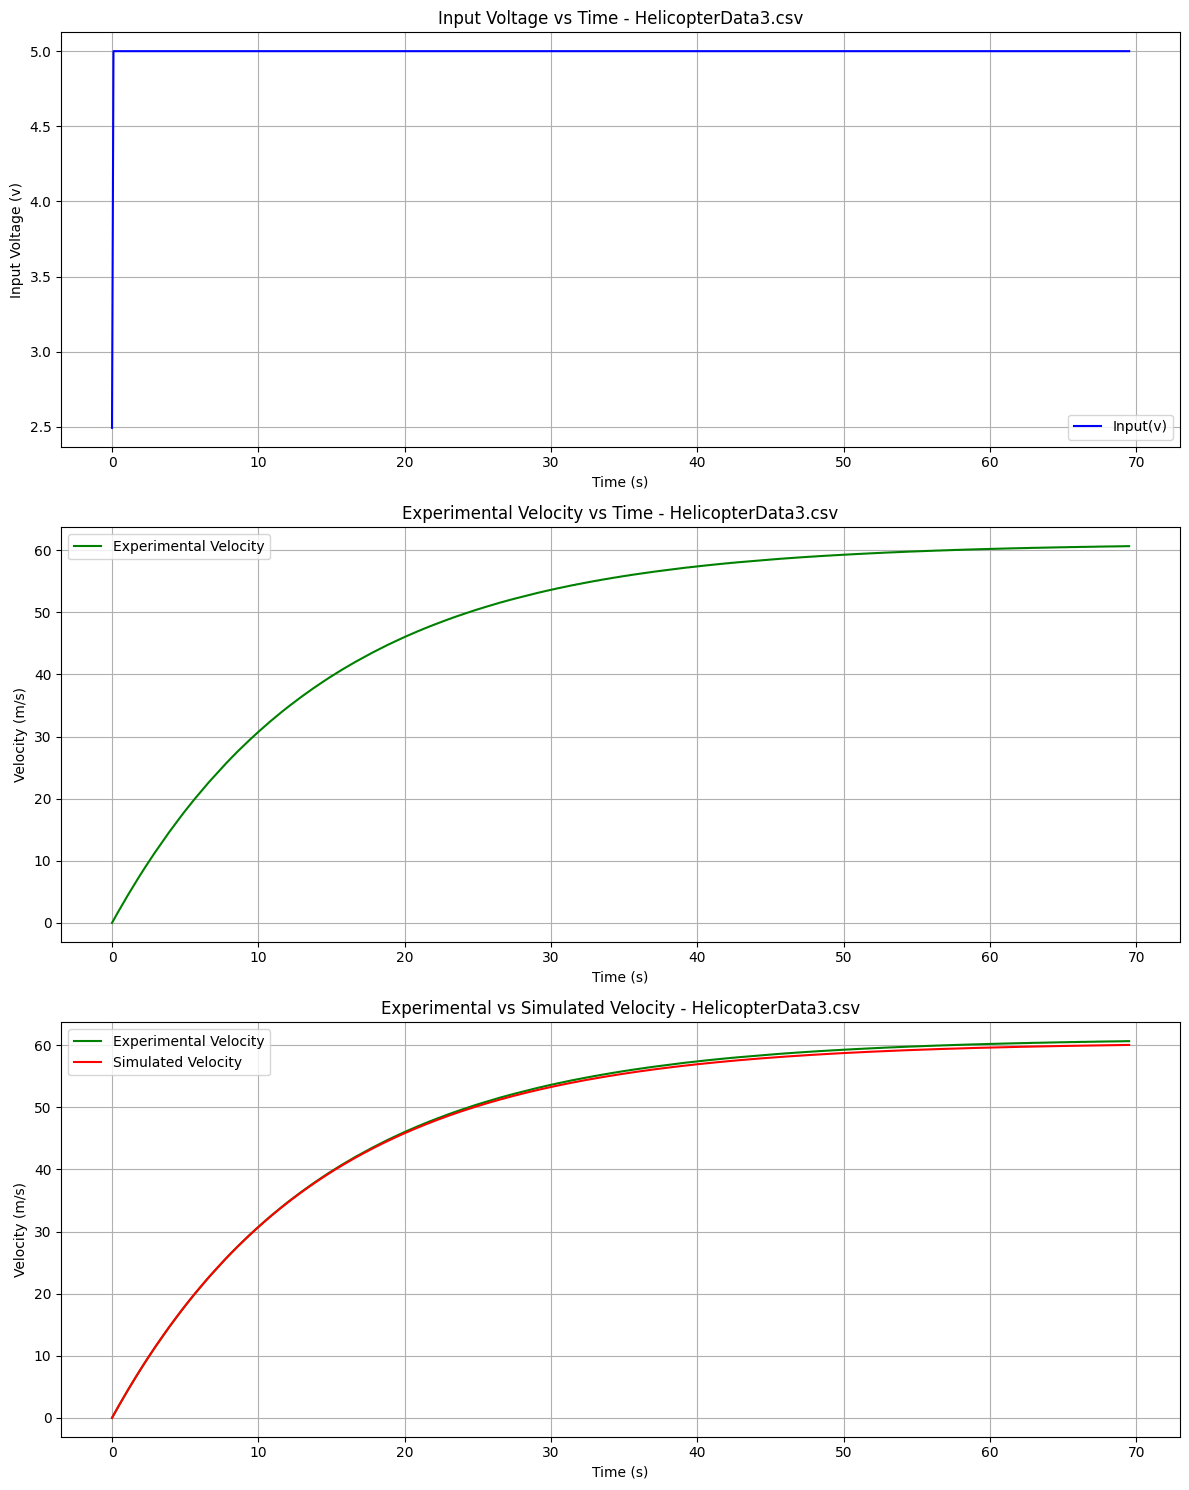

For file: HelicopterData3.csv
Gain (A): 24.19226166733125 m/s
Time Constant (tau): 14.1 s
Final Velocity: 60.649999999999444 m/s
The aerodynamic drag: 0.07092198581560284
Approximate Transfer Function for HelicopterData3.csv: G(s) = 24.19226166733125/14.1s + 1
---------------------------------------------------------------


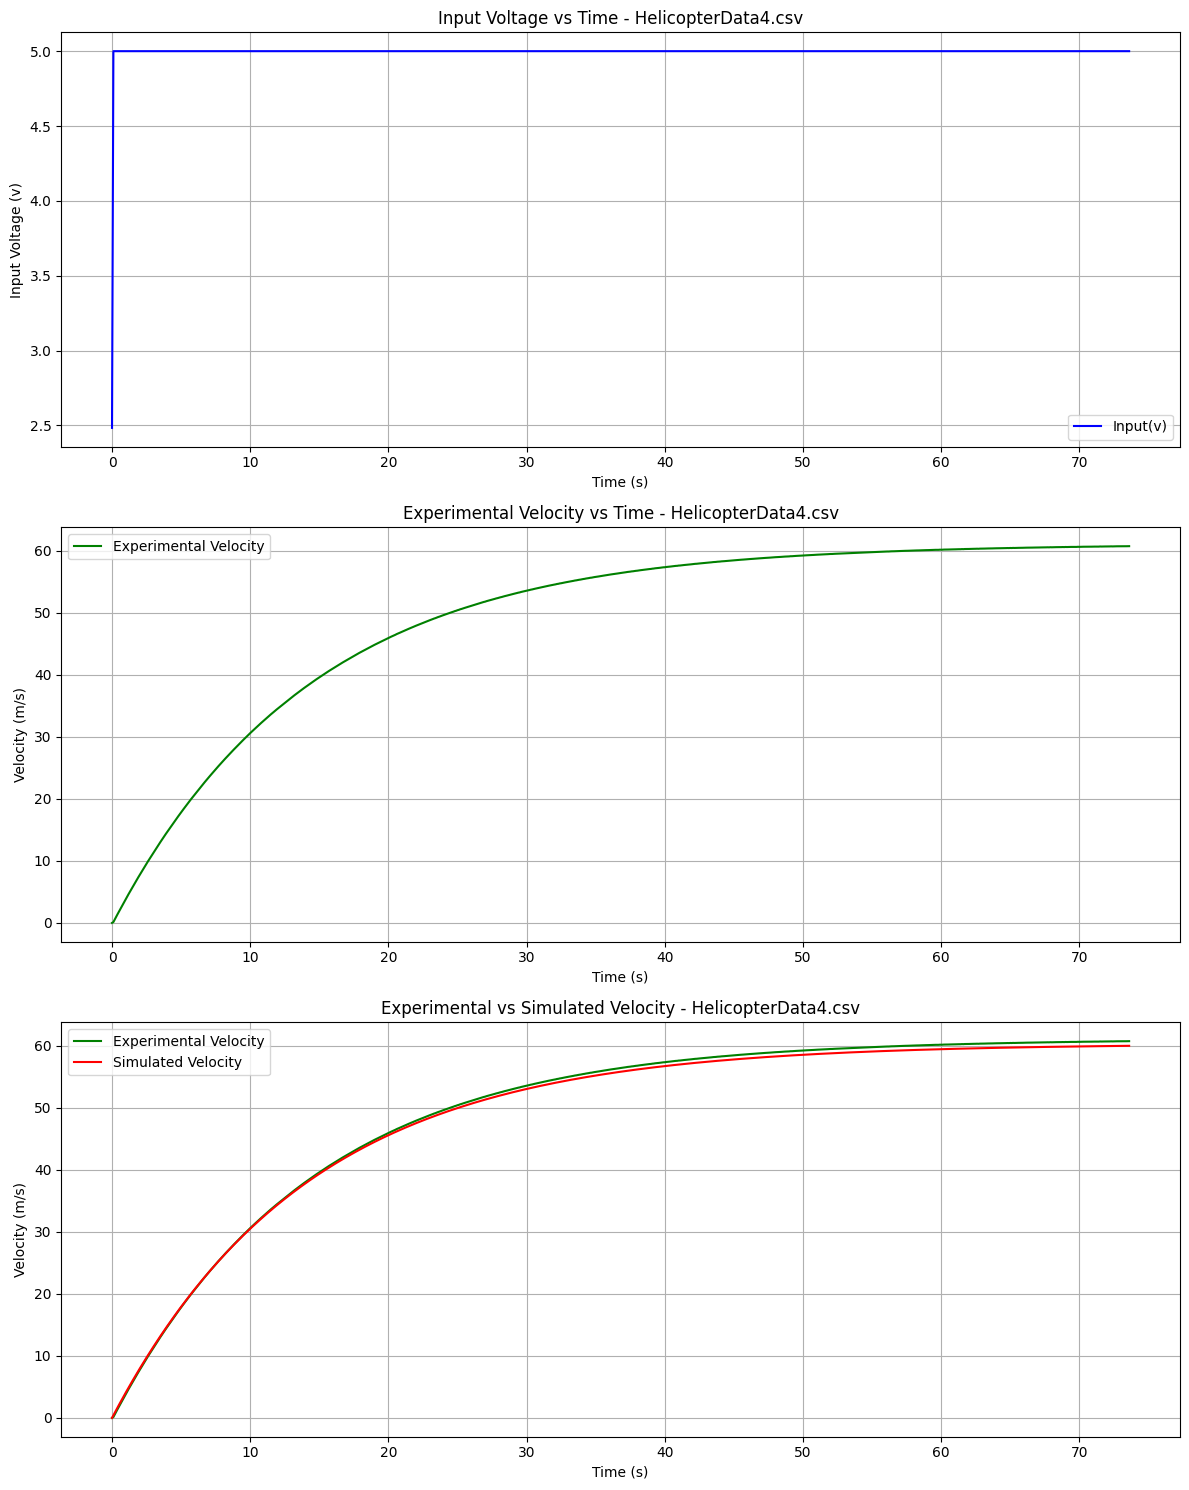

For file: HelicopterData4.csv
Gain (A): 24.14382201033022 m/s
Time Constant (tau): 14.200000000000001 s
Final Velocity: 60.77000000000116 m/s
The aerodynamic drag: 0.0704225352112676
Approximate Transfer Function for HelicopterData4.csv: G(s) = 24.14382201033022/14.200000000000001s + 1
---------------------------------------------------------------


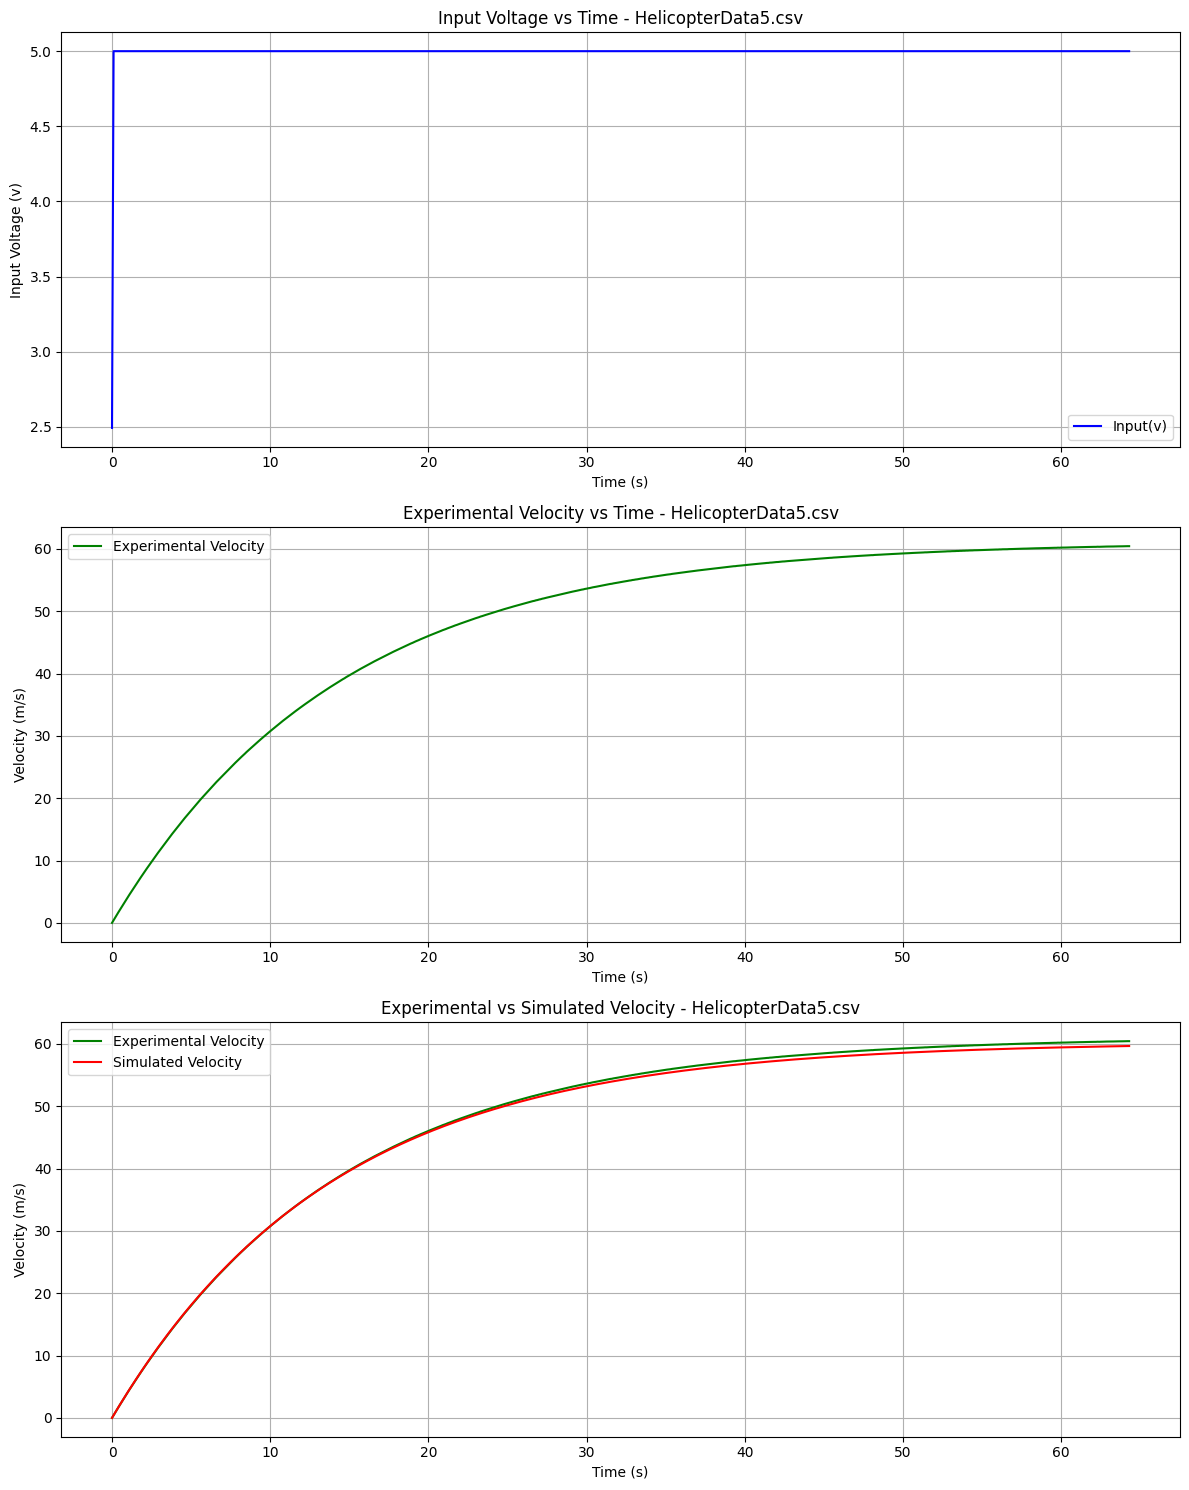

For file: HelicopterData5.csv
Gain (A): 24.10849621061114 m/s
Time Constant (tau): 14.0 s
Final Velocity: 60.44000000000213 m/s
The aerodynamic drag: 0.07142857142857142
Approximate Transfer Function for HelicopterData5.csv: G(s) = 24.10849621061114/14.0s + 1
---------------------------------------------------------------


In [3]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import control as ctl

# List all CSV files in the 'KITTICOPTER' folder
csv_files = [f for f in os.listdir('KITTICOPTER') if f.endswith('.csv')]

# Loop through all CSV files
for file_name in csv_files:
    file_path = os.path.join('KITTICOPTER', file_name)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Calculate velocity and add it as a new column
    delta_position = df['Output(m)'].diff()
    delta_time = df['Time(s)'].diff()
    df['Velocity'] = delta_position / delta_time
    df['Velocity'].fillna(0, inplace=True)
    
    # Calculate the final steady-state value of the velocity (Gain K)
    final_velocity = df['Velocity'].iloc[-1]
    
    # Calculate 63.2% of the final steady-state value
    final_value_63_percent = 0.632 * final_velocity
    
    # Find the time when the velocity reaches 63.2% of its final value
    time_63_percent = df[df['Velocity'] >= final_value_63_percent]['Time(s)'].iloc[0]
    
    # Calculate the time constant (tau), considering the initial time where velocity starts to change
    initial_time = df[df['Velocity'] > 0]['Time(s)'].iloc[0]
    tau = time_63_percent - initial_time
    
    # Calculate Gain
    stepMag = df['Input(v)'].iloc[-1] - df['Input(v)'].iloc[0]
    gain = final_velocity / stepMag
    
    # Create a transfer function
    numerator = [gain]
    denominator = [tau, 1]
    system = ctl.tf(numerator, denominator)
    
    # Time vector for simulation
    time = np.linspace(df['Time(s)'].iloc[0], df['Time(s)'].iloc[-1], len(df))
    
    # Simulate the step response
    time, simulated_output = ctl.forced_response(system, time, 2.5 * np.ones_like(time))

    # Create the plots
    fig, axs = plt.subplots(3, 1, figsize=(12, 15))

    axs[0].plot(df['Time(s)'], df['Input(v)'], label='Input(v)', color='blue')
    axs[0].set_title(f'Input Voltage vs Time - {file_name}')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Input Voltage (v)')
    axs[0].grid(True)
    axs[0].legend()

    axs[1].plot(df['Time(s)'], df['Velocity'], label='Experimental Velocity', color='green')
    axs[1].set_title(f'Experimental Velocity vs Time - {file_name}')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Velocity (m/s)')
    axs[1].grid(True)
    axs[1].legend()

    axs[2].plot(df['Time(s)'], df['Velocity'], label='Experimental Velocity', color='green')
    axs[2].plot(time, simulated_output, label='Simulated Velocity', color='red')
    axs[2].set_title(f'Experimental vs Simulated Velocity - {file_name}')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Velocity (m/s)')
    axs[2].grid(True)
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    print(f"For file: {file_name}")
    print(f"Gain (A): {gain} m/s")
    print(f"Time Constant (tau): {tau} s")
    print(f"Final Velocity: {final_velocity} m/s")
    print(f"The aerodynamic drag: {1 / tau}")
    print(f"Approximate Transfer Function for {file_name}: G(s) = {gain}/{tau}s + 1")
    print("---------------------------------------------------------------")


## Sensor Scalar coefficient

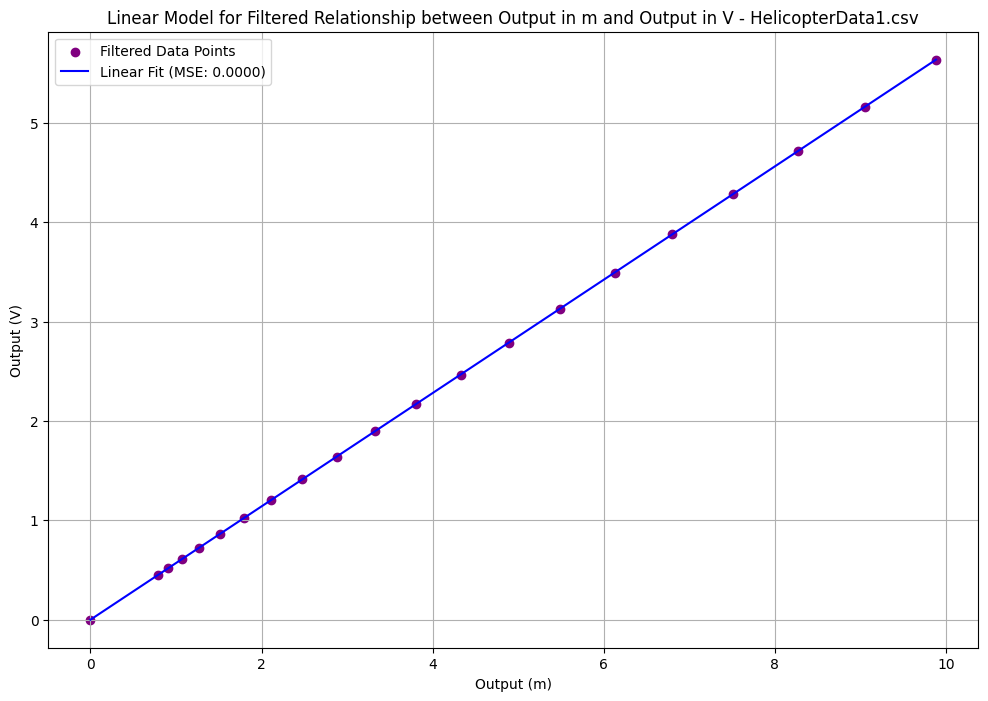

For file: HelicopterData1.csv
Pearson Correlation Coefficient: 0.9999999843528387
MSE for Linear Fit: 8.56527365226518e-08
Linear Equation for HelicopterData1.csv: y = 0.5700198854477228 * x + -0.00018126296247933382
---------------------------------------------------------------


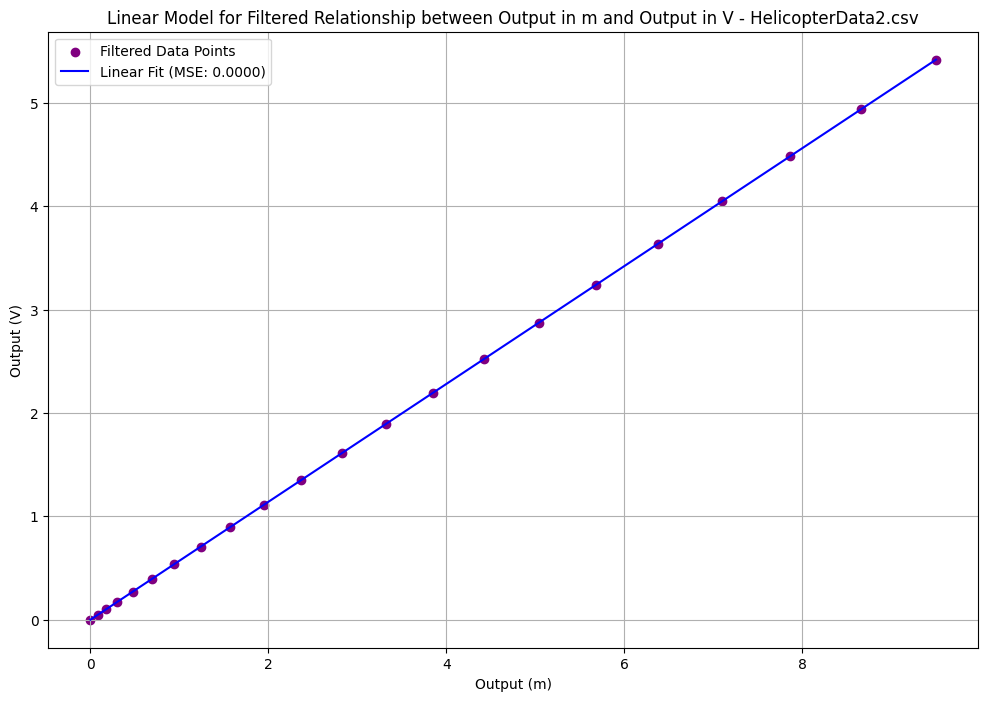

For file: HelicopterData2.csv
Pearson Correlation Coefficient: 0.9999999875606427
MSE for Linear Fit: 7.07518141193802e-08
Linear Equation for HelicopterData2.csv: y = 0.5700502448969869 * x + -0.00014006070542871285
---------------------------------------------------------------


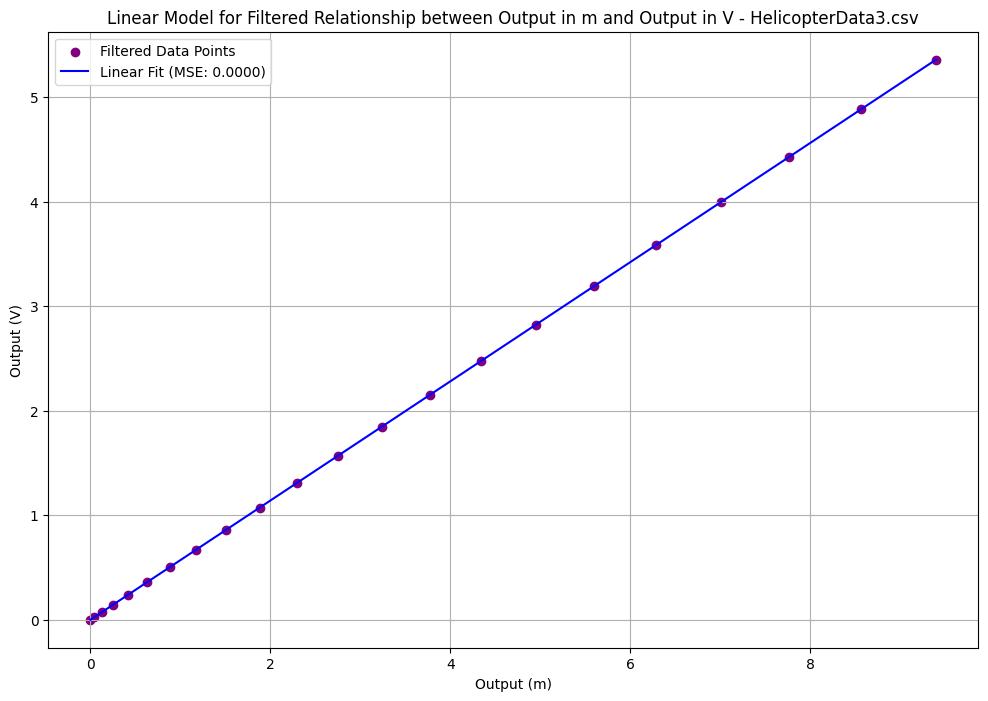

For file: HelicopterData3.csv
Pearson Correlation Coefficient: 0.9999999846433845
MSE for Linear Fit: 8.609602059854577e-08
Linear Equation for HelicopterData3.csv: y = 0.5699975227937 * x + 6.502392768692467e-05
---------------------------------------------------------------


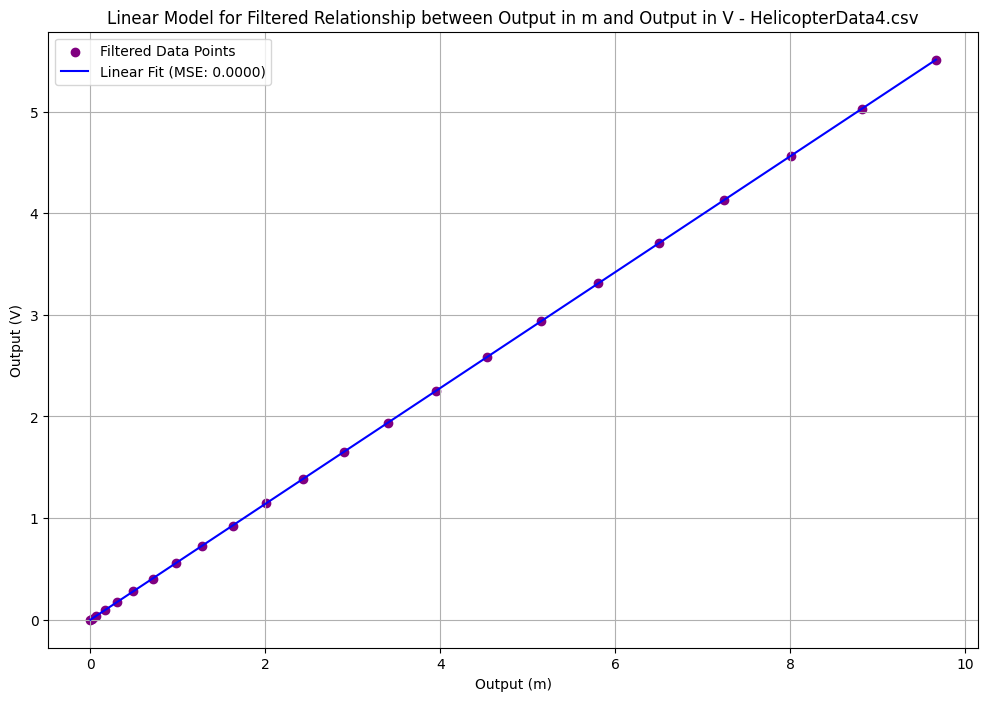

For file: HelicopterData4.csv
Pearson Correlation Coefficient: 0.9999999831910422
MSE for Linear Fit: 1.0025460899984149e-07
Linear Equation for HelicopterData4.csv: y = 0.5700048137443431 * x + -7.983418895296523e-05
---------------------------------------------------------------


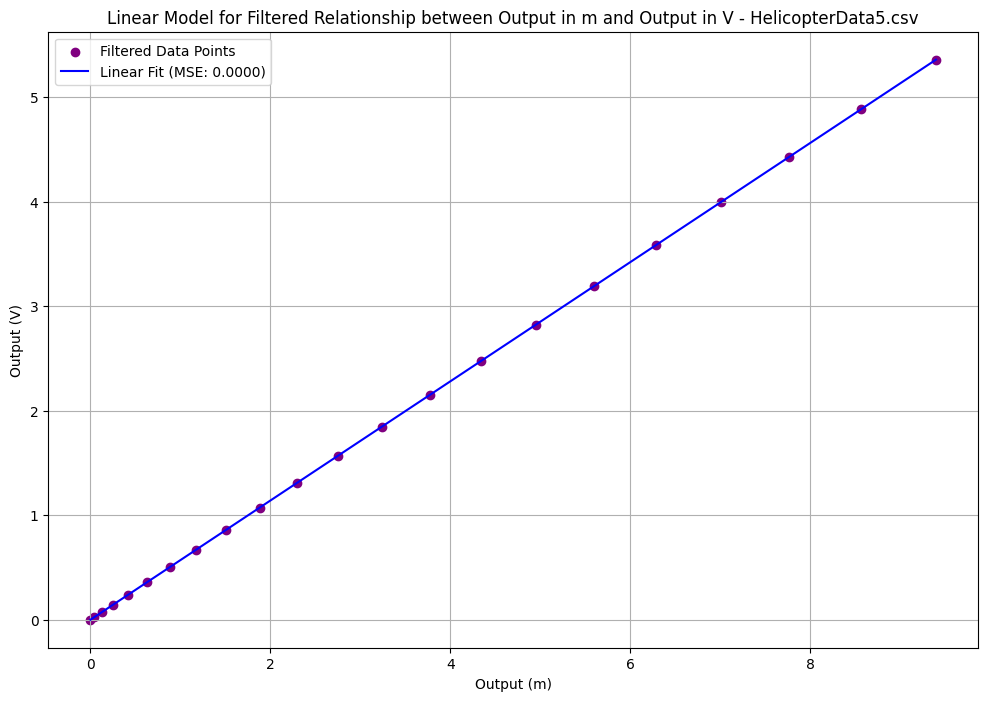

For file: HelicopterData5.csv
Pearson Correlation Coefficient: 0.9999999846433845
MSE for Linear Fit: 8.609602059854577e-08
Linear Equation for HelicopterData5.csv: y = 0.5699975227937 * x + 6.502392768692467e-05
---------------------------------------------------------------


In [4]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# List all CSV files in the 'KITTICOPTER' folder
csv_files = [f for f in os.listdir('KITTICOPTER') if f.endswith('.csv')]

# Loop through all CSV files
for file_name in csv_files:
    file_path = os.path.join('KITTICOPTER', file_name)
    
    # Read the CSV file
    df_new = pd.read_csv(file_path)

    # Filter data for Output(m) <= 10
    df_filtered = df_new[df_new['Output(m)'] <= 10]

    # Calculate Pearson correlation coefficient
    correlation_coefficient, _ = pearsonr(df_filtered['Output(m)'], df_filtered['Output(v)'])

    # Prepare data for the linear regression model
    X_filtered = df_filtered[['Output(m)']].values  # Convert to numpy array
    y_filtered = df_filtered['Output(v)'].values  # Convert to numpy array

    # Linear Regression
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_filtered, y_filtered)
    y_pred_linear_filtered = linear_regressor.predict(X_filtered)
    mse_linear_filtered = mean_squared_error(y_filtered, y_pred_linear_filtered)

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.scatter(X_filtered, y_filtered, color='purple', label='Filtered Data Points')
    plt.plot(X_filtered, y_pred_linear_filtered, color='blue', label=f'Linear Fit (MSE: {mse_linear_filtered:.4f})')
    plt.title(f'Linear Model for Filtered Relationship between Output in m and Output in V - {file_name}')
    plt.xlabel('Output (m)')
    plt.ylabel('Output (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Display correlation coefficient and MSE
    print(f"For file: {file_name}")
    print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
    print(f'MSE for Linear Fit: {mse_linear_filtered}')

    # Extract and display the equation for the linear model
    print(f'Linear Equation for {file_name}: y = {linear_regressor.coef_[0]} * x + {linear_regressor.intercept_}')
    print("---------------------------------------------------------------")
